   # Tensorflow - Classification Problems
    
   * Binary Classifications
   * Multiclass Classifications
   * Multilabel Classifications

In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_circles

## Working with Non-Linear Datasets

In [3]:
# creating data
n_samples = 1000
X, y = make_circles(n_samples,
                   noise=0.025,
                   random_state=42)

# check features and labels
X, y

# (array([[ 0.75424625,  0.23148074],
#         [-0.75615888,  0.15325888],
#         [-0.81539193,  0.17328203],
#         ...,
#         [-0.13690036, -0.81001183],
#         [ 0.67036156, -0.76750154],
#         [ 0.28105665,  0.96382443]]),
#  array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
#         0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
#         0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
#         1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
#         1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
#         1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
#         0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
#         1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
#         0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
#         1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
#         0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
#         1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
#         0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
#         0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
#         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
#         1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
#         1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
#         0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
#         0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
#         1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
#         0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
#         1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
#         1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
#         1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
#         1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
#         0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
#         1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
#         1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
#         1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
#         0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
#         0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
#         1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
#         1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
#         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
#         1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
#         1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
#         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
#         1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
#         1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
#         0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
#         0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
#         0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
#         0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
#         1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
#         0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
#         0, 1, 0, 1, 0, 0, 0, 1, 0, 0]))

(array([[ 0.75725609,  0.22767948],
        [-0.76169053,  0.14940069],
        [-0.81177524,  0.16111279],
        ...,
        [-0.13906781, -0.80598149],
        [ 0.67272582, -0.76107939],
        [ 0.28171709,  0.96294066]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
# the dataset has two labels 1 & 0 for datapoints
# of the inner and outer circle generated by Scikit-Learn

circles = pd.DataFrame({"X0":X[:,0], "X1": X[:, 1], "label":y})
circles, X.shape, y.shape

# (           X0        X1  label
#  0    0.754246  0.231481      1
#  1   -0.756159  0.153259      1
#  2   -0.815392  0.173282      1
#  3   -0.393731  0.692883      1
#  4    0.442208 -0.896723      0
#  ..        ...       ...    ...
#  995  0.244054  0.944125      0
#  996 -0.978655 -0.272373      0
#  997 -0.136900 -0.810012      1
#  998  0.670362 -0.767502      0
#  999  0.281057  0.963824      0
 
#  [1000 rows x 3 columns],
#  (1000, 2),
#  (1000,))

(           X0        X1  label
 0    0.757256  0.227679      1
 1   -0.761691  0.149401      1
 2   -0.811775  0.161113      1
 3   -0.384880  0.698046      1
 4    0.441359 -0.897170      0
 ..        ...       ...    ...
 995  0.242795  0.948710      0
 996 -0.976976 -0.268426      0
 997 -0.139068 -0.805981      1
 998  0.672726 -0.761079      0
 999  0.281717  0.962941      0
 
 [1000 rows x 3 columns],
 (1000, 2),
 (1000,))

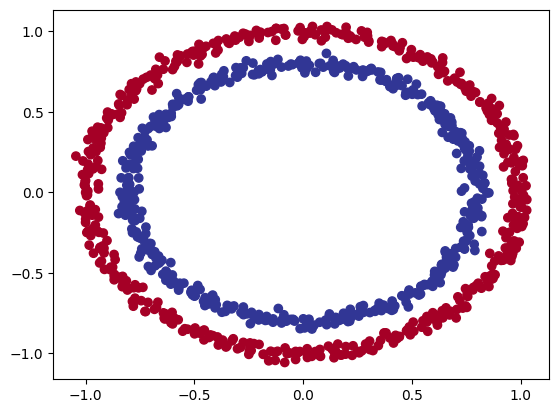

In [5]:
# we can visualize them in a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_01.png)

## Building the Model

We can now build a neural network that allows us to do a binary classification between datapoints that belong to the blue and red circle.

In [40]:
tf.random.set_seed(42)

model_circles = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer")
], name="model_circles")

model_circles.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"])

# earlystop_callback = tf.keras.callbacks.EarlyStopping(
#   monitor='val_loss', min_delta=0.00001,
#   patience=100, restore_best_weights=True)

model_circles.fit(X, y, epochs=10) # callbacks=[earlystop_callback]
model_circles.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7405 - accuracy: 0.5050
# [0.7405271530151367, 0.5049999952316284
#
# currently the model only predicts with a 45% accuracy... worse than pure guessing with a binary choice

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 6.0180 - accuracy: 0.4870
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 5.7225 - accuracy: 0.4880
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.8668 - accuracy: 0.4770
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 4.5345 - accuracy: 0.4670
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 4.2597 - accuracy: 0.4730
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9166 - accuracy: 0.4800
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7446 - accuracy: 0.4740
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 3.5293 - accuracy: 0.4770
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 2.6574 - accuracy: 0.4780
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.7830 - accuracy: 0.4950


[0.7829642295837402, 0.4950000047683716]

In [42]:
tf.random.set_seed(42)

# adding complexity + activation functions
model_circles_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, name="input_layer"),
    tf.keras.layers.Dense(16, name="dense_layer1"),
    tf.keras.layers.Dense(8, name="dense_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_circles_1")

# # adding complexity + activation functions
# model_circles_1 = tf.keras.Sequential([
#     tf.keras.layers.Dense(8, activation="relu", name="input_layer"),
#     tf.keras.layers.Dense(16, activation="relu", name="dense_layer1"),
#     tf.keras.layers.Dense(8, activation="relu", name="dense_layer2"),
#     tf.keras.layers.Dense(1, activation="relu", name="output_layer")
# ], name="model_circles_1")

model_circles_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"])

history_1 = model_circles_1.fit(X, y, epochs=150, verbose=0)
model_circles_1.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7405 - accuracy: 0.5050
# [0.7405271530151367, 0.5049999952316284]

# not much better...

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4740


[0.6931759119033813, 0.4740000069141388]

Text(0.5, 0, 'epochs')

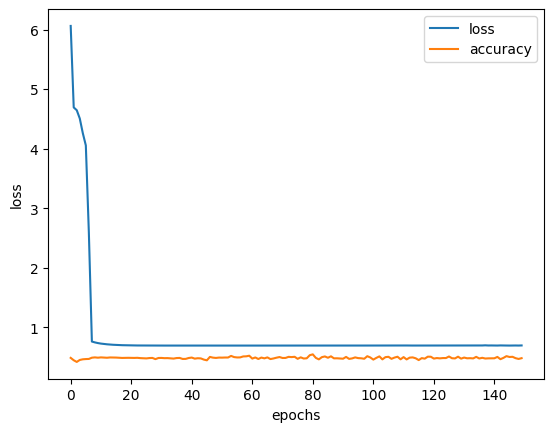

In [43]:
# history plot
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_02.png)

### Why it Fails

In [12]:
# visualize predictions
# https://cs231n.github.io/neural-networks-case-study/

def decision_boundray(model, X, y):
    
    # define axis boundries for features and labels
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # create meshgrid within boundries (fresh data to run predictions on)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # stack both mesh arrays together
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    # make predictions using the trained model
    y_pred = model.predict(x_in)
    
    # check for multiclass-classification 
    if len(y_pred[0]) > 1:
        # reshape predictions
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot decision boundry
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 828us/step


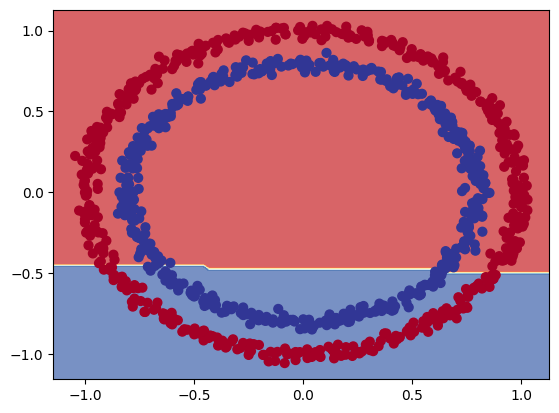

In [45]:
decision_boundray(model=model_circles_1, X=X, y=y)
# the model is trying to draw a straight line through the dataset to differentiate between both classes
# it then expands this line and tries to divide both classes - and fails with a circular dataset.

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_03.png)

## Non Linearity

> Experimenting with the [Tensorflow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.14938&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to find a model that works for the non-linear classification problem.

A model useable for linear problems will remain stuck at an accuracy around 50% - purely guessing when predicting:

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_04.png)

In [47]:
# rebuilding the model (above)
tf.random.set_seed(42)

model_circles_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear", name="input_layer")
])

model_circles_2.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_2 = model_circles_2.fit(X, y, epochs=150, verbose=0)
model_circles_2.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.4590
# [0.7222346067428589, 0.45899999141693115]

32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.4590


[0.7222346067428589, 0.45899999141693115]

313/313 [==============================] - 0s 774us/step


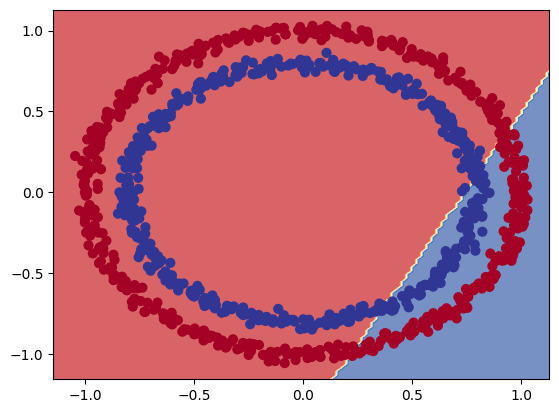

In [48]:
decision_boundray(model=model_circles_2, X=X, y=y)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_05.png)

I am starting to get a good separation with the following setup after approx. 2000 epochs:


![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_06.png)

In [52]:
# rebuilding the model (above)
tf.random.set_seed(42)

model_circles_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu")
])

model_circles_3.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_3 = model_circles_3.fit(X, y, epochs=2000, verbose=0)
model_circles_3.evaluate(X, y)

# 32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000
# [0.693161129951477, 0.5]

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931561231613159, 0.5]

313/313 [==============================] - 0s 843us/step


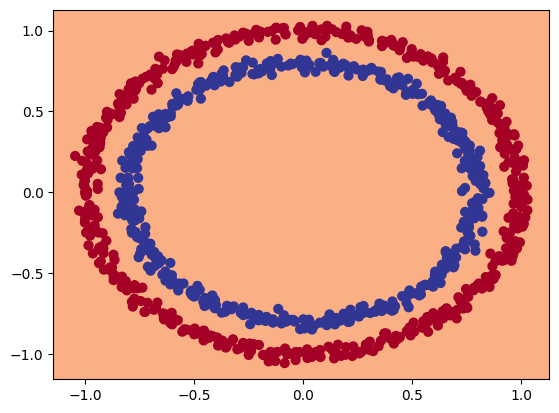

In [51]:
decision_boundray(model=model_circles_3, X=X, y=y)
# well, that isn't good...

In [55]:
# rebuilding the model (2nd attempt)
# adding an output layer with a single neuron for the binary classification

tf.random.set_seed(42)

model_circles_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

model_circles_4.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_4 = model_circles_4.fit(X, y, epochs=2000, verbose=0)
model_circles_4.evaluate(X, y)

# 32/32 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8320
# [0.34036046266555786, 0.8320000171661377]

32/32 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8320


[0.34036046266555786, 0.8320000171661377]

313/313 [==============================] - 0s 821us/step


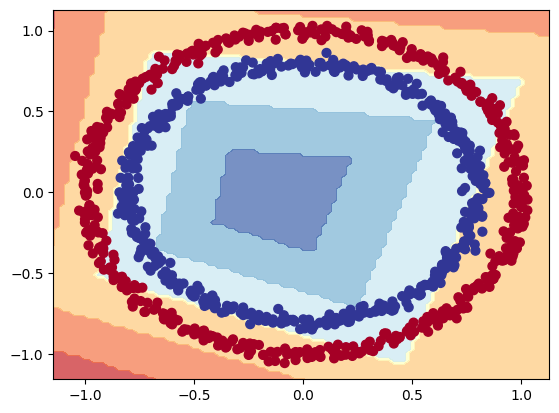

In [56]:
decision_boundray(model=model_circles_4, X=X, y=y)
# much better - but not as good as the example from the tf.playground

In [62]:
# rebuilding the model (2nd attempt)
# adding an "sigmoid" activation for the output layer

tf.random.set_seed(42)

model_circles_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_6.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

model_circles_6.fit(X, y, epochs=2000, verbose=0)
model_circles_6.evaluate(X, y)
32/32 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 1.0000
[0.0241051334887743, 1.0]

32/32 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 1.0000


[0.0241051334887743, 1.0]

313/313 [==============================] - 0s 779us/step


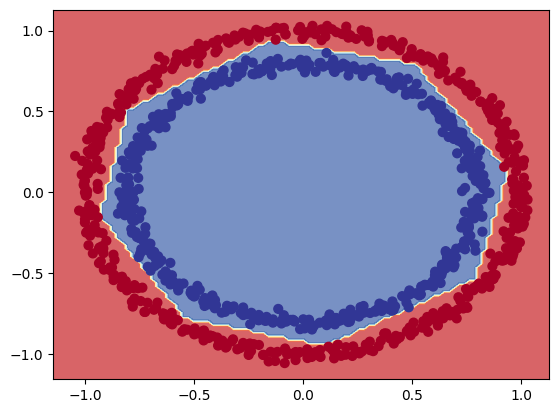

In [63]:
decision_boundray(model=model_circles_6, X=X, y=y)
# there you go...

## Non-linear Activation Functions

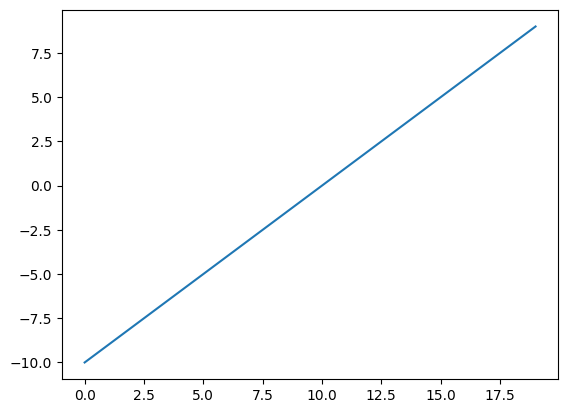

In [64]:
# create a input tensor
input_linear = tf.cast(tf.range(-10, 10), tf.float32)

# visualize the tensor
plt.plot(input_linear)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_07.png)

### Linear Activation Function

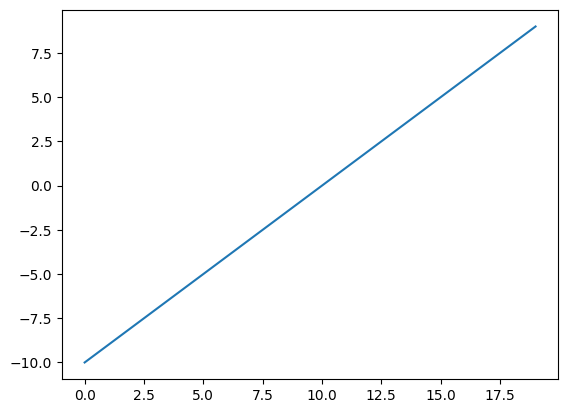

In [77]:
# replicating the linear activation function linear(x) = x
def linear(X):
    return X

linear(input_linear)

# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
#          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
#       dtype=float32)>

plt.plot(linear(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_08.png)

### Sigmoid Activation Function

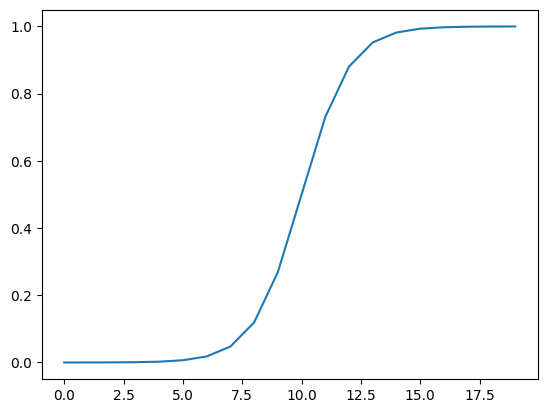

In [68]:
# replicating the sigmoid activation function sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(X):
    return 1/(1 + tf.exp(-X))

sigmoid(input_linear)

# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
#        2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
#        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
#        8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
#        9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
#       dtype=float32)>

plt.plot(sigmoid(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_09.png)

### reLU Activation Function

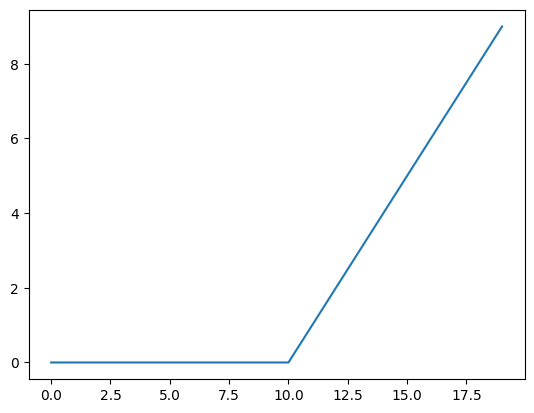

In [71]:
# replicating the reLU function f(x) = 0 for x<0 and x for x>0
def relu(X):
    return tf.maximum(0, X)

relu(input_linear)
# <tf.Tensor: shape=(20,), dtype=float32, numpy=
# array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
#        7., 8., 9.], dtype=float32)>

plt.plot(relu(input_linear))

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_10.png)

## Training & Testing Datasplit

In the example above I used a single dataset to both train and test the model. Let's split this dataset so that we have a fresh testing dataset for the model.

In [8]:
# training and testing data split using scikit-learn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# ((800, 2), (200, 2), (800,), (200,))

((800, 2), (200, 2), (800,), (200,))

In [21]:
# rebuild the best model from above
# train on training set and eval on testing
tf.random.set_seed(42)

model_circles_lr10e_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_lr10e_3.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["accuracy"])

history_lr10e_3 = model_circles_lr10e_3.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=2000)

# Epoch 2000/2000
# 25/25 [==============================] - 0s 3ms/step - loss: 1.0905e-04 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9950

Epoch 1/2000
25/25 [==============================] - 1s 9ms/step - loss: 0.6896 - accuracy: 0.5013 - val_loss: 0.6902 - val_accuracy: 0.5400
Epoch 2/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5038 - val_loss: 0.6881 - val_accuracy: 0.5250
Epoch 3/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5088 - val_loss: 0.6869 - val_accuracy: 0.5100
Epoch 4/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5138 - val_loss: 0.6860 - val_accuracy: 0.5050
Epoch 5/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5213 - val_loss: 0.6858 - val_accuracy: 0.5050
Epoch 6/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5263 - val_loss: 0.6851 - val_accuracy: 0.5050
Epoch 7/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5275 - val_loss: 0.6849 - val_accuracy: 0.5050
Epoch 

25/25 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.8313 - val_loss: 0.5439 - val_accuracy: 0.7850
Epoch 116/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.8313 - val_loss: 0.5417 - val_accuracy: 0.7900
Epoch 117/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.8313 - val_loss: 0.5393 - val_accuracy: 0.7900
Epoch 118/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.8375 - val_loss: 0.5382 - val_accuracy: 0.7900
Epoch 119/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.8388 - val_loss: 0.5363 - val_accuracy: 0.8050
Epoch 120/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.8462 - val_loss: 0.5341 - val_accuracy: 0.7950
Epoch 121/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.4810 - accuracy: 0.8350 - val_loss: 0.5318 - val_accuracy: 0.7850
Epoch 1

Epoch 172/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8737 - val_loss: 0.4026 - val_accuracy: 0.8350
Epoch 173/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3426 - accuracy: 0.8725 - val_loss: 0.4004 - val_accuracy: 0.8350
Epoch 174/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3413 - accuracy: 0.8737 - val_loss: 0.3991 - val_accuracy: 0.8350
Epoch 175/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8737 - val_loss: 0.3996 - val_accuracy: 0.8350
Epoch 176/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.8737 - val_loss: 0.3972 - val_accuracy: 0.8350
Epoch 177/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8750 - val_loss: 0.3965 - val_accuracy: 0.8350
Epoch 178/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.8750 - val_loss: 0.3953 - val_accuracy:

Epoch 229/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2676 - accuracy: 0.8963 - val_loss: 0.3085 - val_accuracy: 0.8600
Epoch 230/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2665 - accuracy: 0.8963 - val_loss: 0.3054 - val_accuracy: 0.8650
Epoch 231/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2648 - accuracy: 0.8988 - val_loss: 0.3056 - val_accuracy: 0.8650
Epoch 232/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.8975 - val_loss: 0.3027 - val_accuracy: 0.8750
Epoch 233/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2627 - accuracy: 0.8963 - val_loss: 0.3023 - val_accuracy: 0.8650
Epoch 234/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.2618 - accuracy: 0.8988 - val_loss: 0.2996 - val_accuracy: 0.8750
Epoch 235/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.8963 - val_loss: 0.2987 - val_accuracy:

Epoch 286/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9962 - val_loss: 0.1180 - val_accuracy: 0.9950
Epoch 287/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0895 - accuracy: 0.9962 - val_loss: 0.1188 - val_accuracy: 1.0000
Epoch 288/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0882 - accuracy: 0.9962 - val_loss: 0.1175 - val_accuracy: 1.0000
Epoch 289/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.9962 - val_loss: 0.1162 - val_accuracy: 1.0000
Epoch 290/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9962 - val_loss: 0.1150 - val_accuracy: 1.0000
Epoch 291/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9962 - val_loss: 0.1143 - val_accuracy: 0.9950
Epoch 292/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9962 - val_loss: 0.1141 - val_accuracy:

Epoch 343/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9987 - val_loss: 0.0788 - val_accuracy: 0.9900
Epoch 344/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9987 - val_loss: 0.0786 - val_accuracy: 0.9850
Epoch 345/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9987 - val_loss: 0.0779 - val_accuracy: 0.9900
Epoch 346/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9987 - val_loss: 0.0776 - val_accuracy: 0.9950
Epoch 347/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9987 - val_loss: 0.0766 - val_accuracy: 0.9900
Epoch 348/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9987 - val_loss: 0.0761 - val_accuracy: 0.9950
Epoch 349/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9987 - val_loss: 0.0761 - val_accuracy:

Epoch 400/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9900
Epoch 401/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9900
Epoch 402/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9987 - val_loss: 0.0553 - val_accuracy: 0.9900
Epoch 403/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9900
Epoch 404/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9850
Epoch 405/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9987 - val_loss: 0.0538 - val_accuracy: 0.9900
Epoch 406/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy:

Epoch 457/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9900
Epoch 458/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9900
Epoch 459/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9900
Epoch 460/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 0.9900
Epoch 461/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9900
Epoch 462/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 0.9900
Epoch 463/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy:

Epoch 514/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 515/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0345 - val_accuracy: 0.9900
Epoch 516/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 0.9900
Epoch 517/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 0.9900
Epoch 518/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0333 - val_accuracy: 0.9900
Epoch 519/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0334 - val_accuracy: 0.9900
Epoch 520/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy:

Epoch 571/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 0.9900
Epoch 572/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9900
Epoch 573/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 0.9900
Epoch 574/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 0.9900
Epoch 575/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0269 - val_accuracy: 0.9850
Epoch 576/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9900
Epoch 577/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy:

Epoch 628/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy: 0.9900
Epoch 629/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 0.9900
Epoch 630/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9900
Epoch 631/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9900
Epoch 632/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9900
Epoch 633/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 0.9900
Epoch 634/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0212 - val_accuracy:

Epoch 685/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0172 - val_accuracy: 0.9950
Epoch 686/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9950
Epoch 687/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 0.9950
Epoch 688/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9950
Epoch 689/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9950
Epoch 690/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9950
Epoch 691/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy:

Epoch 742/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 743/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9950
Epoch 744/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 745/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 746/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 747/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 0.9950
Epoch 748/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy:

Epoch 799/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9950
Epoch 800/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 801/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 802/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 803/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 804/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9950
Epoch 805/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy:

Epoch 856/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 857/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 0.9950
Epoch 858/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 859/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 860/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 861/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 862/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy:

Epoch 913/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 914/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 915/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 916/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 917/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 918/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 919/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy:

Epoch 970/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 971/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 972/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 973/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 974/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 975/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 976/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy:

Epoch 1027/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 1028/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 1029/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 1030/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 1031/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 1032/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 1033/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0064 - val_ac

25/25 [==============================] - 0s 3ms/step - loss: 8.0709e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 1139/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.8375e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9950
Epoch 1140/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.1113e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 1141/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.6926e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1142/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.8697e-04 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 1143/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.0405e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 1144/2000
25/25 [==============================] - 0s 4ms/step - loss: 8.0768e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 6.9451e-04 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9950
Epoch 1194/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.5254e-04 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 1195/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.7420e-04 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 1196/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.3658e-04 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 1197/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.5884e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 1198/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.1748e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9950
Epoch 1199/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.9956e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 6.7932e-04 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 1249/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.4619e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9950
Epoch 1250/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.6240e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 1251/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.9710e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 1252/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.8267e-04 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 1253/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.7234e-04 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 1254/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.1028e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 5.0411e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 1304/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.7709e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1305/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.0457e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9950
Epoch 1306/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.9617e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 1307/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.7831e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1308/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.9882e-04 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 0.9950
Epoch 1309/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.0694e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 4.2832e-04 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 1359/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.3372e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 0.9950
Epoch 1360/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.2275e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1361/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.6799e-04 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 0.9950
Epoch 1362/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.5920e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 1363/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.6246e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 1364/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.3634e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 3.8434e-04 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 1414/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.6061e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9950
Epoch 1415/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.8120e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9950
Epoch 1416/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.8700e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 1417/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.7788e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9950
Epoch 1418/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.8285e-04 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 0.9950
Epoch 1419/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0480e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 3.2980e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 0.9950
Epoch 1469/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.4758e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9950
Epoch 1470/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.1339e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 1471/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2552e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9950
Epoch 1472/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.3580e-04 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 1473/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.7349e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9950
Epoch 1474/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.7767e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 3.0994e-04 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 1524/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.9243e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 1525/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.3701e-04 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 1526/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.3082e-04 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9950
Epoch 1527/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9247e-04 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 1528/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8578e-04 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 0.9950
Epoch 1529/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9866e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 2.5658e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9950
Epoch 1579/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9248e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9950
Epoch 1580/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.0374e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 1581/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.8982e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9950
Epoch 1582/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5685e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9950
Epoch 1583/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5470e-04 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 1584/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5419e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 4ms/step - loss: 2.4004e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9950
Epoch 1634/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.4778e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 1635/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.5202e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 1636/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.3551e-04 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9950
Epoch 1637/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.2058e-04 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9950
Epoch 1638/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.3521e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9950
Epoch 1639/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.2284e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 2.2366e-04 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 1689/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.9589e-04 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9950
Epoch 1690/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.0585e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9950
Epoch 1691/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.0399e-04 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9950
Epoch 1692/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.9740e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9950
Epoch 1693/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.0994e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9950
Epoch 1694/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.8544e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 4ms/step - loss: 1.6749e-04 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9950
Epoch 1744/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.8861e-04 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9950
Epoch 1745/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.0198e-04 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 1746/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.6685e-04 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9950
Epoch 1747/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.8057e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 0.9950
Epoch 1748/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.7129e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9950
Epoch 1749/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.8171e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 4ms/step - loss: 1.6113e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9950
Epoch 1799/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5370e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9950
Epoch 1800/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5349e-04 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9950
Epoch 1801/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.3812e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 1802/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5219e-04 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9950
Epoch 1803/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5028e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9950
Epoch 1804/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5244e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 1.4038e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9950
Epoch 1854/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5130e-04 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 0.9950
Epoch 1855/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.6334e-04 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 0.9950
Epoch 1856/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.8473e-04 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 0.9950
Epoch 1857/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.8489e-04 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 0.9950
Epoch 1858/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.2320e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9950
Epoch 1859/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.4706e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 1.2817e-04 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 0.9950
Epoch 1909/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.2485e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 1910/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1505e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 0.9950
Epoch 1911/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1580e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9950
Epoch 1912/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1875e-04 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9950
Epoch 1913/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.4146e-04 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 0.9950
Epoch 1914/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.3039e-04 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 1.1083e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9950
Epoch 1964/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1135e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9950
Epoch 1965/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.0392e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 0.9950
Epoch 1966/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.0103e-04 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9950
Epoch 1967/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.2727e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9950
Epoch 1968/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.2567e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9950
Epoch 1969/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1287e-04 - accuracy: 1.0000 - val_loss: 0.0

313/313 [==============================] - 0s 865us/step


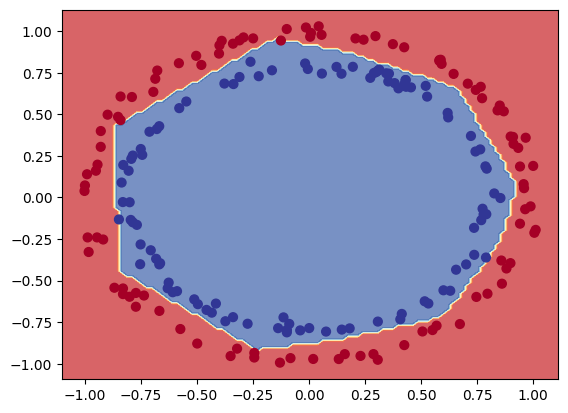

In [22]:
decision_boundray(model=model_circles_lr10e_3, X=X_test, y=y_test)

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_11.png)

## Learning Rate

In the example above it took __256__ cycles to get to an __val_accuracy: 0.9000__:

```
25/25 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9100 - val_loss: 0.2647 - val_accuracy: 0.8950
Epoch 255/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9137 - val_loss: 0.2636 - val_accuracy: 0.8900
Epoch 256/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.9162 - val_loss: 0.2595 - val_accuracy: 0.9000
Epoch 257/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9162 - val_loss: 0.2390 - val_accuracy: 0.9000
Epoch 258/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2030 - accuracy: 0.9438 - val_loss: 0.2118 - val_accuracy: 0.9600
```

By increasing the learning rate we allow Tensorflow to make bigger changes to the model weights after each epoch. This should increase the initial speed with which the model is moving towards the optimum:

In [23]:
tf.random.set_seed(42)

model_circles_lr10e_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu", name="input_layer"),
    tf.keras.layers.Dense(4, activation="relu", name="dense_layer"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
])

model_circles_lr10e_2.compile(loss="binary_crossentropy",
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                       metrics=["accuracy"])

history_lr10e_2 = model_circles_lr10e_2.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=2000)

# Epoch 2000/2000
# 25/25 [==============================] - 0s 3ms/step - loss: 7.4626e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9950

Epoch 1/2000
25/25 [==============================] - 1s 8ms/step - loss: 0.6855 - accuracy: 0.5663 - val_loss: 0.6822 - val_accuracy: 0.6000
Epoch 2/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5663 - val_loss: 0.6765 - val_accuracy: 0.6000
Epoch 3/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.5663 - val_loss: 0.6673 - val_accuracy: 0.5850
Epoch 4/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6087 - val_loss: 0.6645 - val_accuracy: 0.5250
Epoch 5/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.5700 - val_loss: 0.6521 - val_accuracy: 0.6050
Epoch 6/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6862 - val_loss: 0.6403 - val_accuracy: 0.6050
Epoch 7/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.6142 - accuracy: 0.6737 - val_loss: 0.6175 - val_accuracy: 0.6950
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 116/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 117/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9950
Epoch 118/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 119/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9950
Epoch 120/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0181 - val_accuracy: 0.9900
Epoch 121/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9975 - val_loss: 0.0124 - val_accuracy: 0.9950
Epoch 1

Epoch 172/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0186 - val_accuracy: 0.9900
Epoch 173/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 174/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9975 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 175/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9975 - val_loss: 0.0135 - val_accuracy: 0.9950
Epoch 176/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9962 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 177/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 178/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy:

Epoch 284/2000
25/25 [==============================] - 0s 3ms/step - loss: 6.1716e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 285/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.3050e-04 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 286/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.2951e-04 - accuracy: 1.0000 - val_loss: 9.8273e-04 - val_accuracy: 1.0000
Epoch 287/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.0832e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 288/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.6393e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 289/2000
25/25 [==============================] - 0s 4ms/step - loss: 6.7250e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 290/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.3903e-04 - accuracy: 1.0000 - 

25/25 [==============================] - 0s 3ms/step - loss: 1.6491e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 395/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5913e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 396/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5967e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 397/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5821e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 398/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5634e-04 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 399/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.6250e-04 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 400/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.6736e-04 - accuracy: 1.0000 - val_loss: 0.0033 - 

25/25 [==============================] - 0s 3ms/step - loss: 1.1251e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 505/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.0911e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 506/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.1005e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 507/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1071e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 508/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1042e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 509/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.0896e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 510/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.0906e-04 - accuracy: 1.0000 - val_loss: 0.0020 - 

25/25 [==============================] - 0s 4ms/step - loss: 9.8128e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 615/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.0441e-05 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 616/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.5190e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 617/2000
25/25 [==============================] - 0s 4ms/step - loss: 9.1037e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 618/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.6116e-05 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 619/2000
25/25 [==============================] - 0s 4ms/step - loss: 9.4238e-05 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 620/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.7320e-05 - accuracy: 1.0000 - val_loss: 0.0019 - 

25/25 [==============================] - 0s 3ms/step - loss: 5.5224e-05 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9950
Epoch 725/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.4619e-05 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9950
Epoch 726/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.4995e-05 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9950
Epoch 727/2000
25/25 [==============================] - 0s 4ms/step - loss: 5.5590e-05 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9950
Epoch 728/2000
25/25 [==============================] - 0s 5ms/step - loss: 5.5398e-05 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9950
Epoch 729/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.4097e-05 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 730/2000
25/25 [==============================] - 0s 3ms/step - loss: 5.4213e-05 - accuracy: 1.0000 - val_loss: 0.0075 - 

25/25 [==============================] - 0s 4ms/step - loss: 4.5192e-05 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 0.9950
Epoch 835/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.1058e-05 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9950
Epoch 836/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.1002e-05 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9950
Epoch 837/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.9936e-05 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9950
Epoch 838/2000
25/25 [==============================] - 0s 4ms/step - loss: 3.9705e-05 - accuracy: 1.0000 - val_loss: 0.0136 - val_accuracy: 0.9950
Epoch 839/2000
25/25 [==============================] - 0s 4ms/step - loss: 4.0740e-05 - accuracy: 1.0000 - val_loss: 0.0152 - val_accuracy: 0.9950
Epoch 840/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.9082e-05 - accuracy: 1.0000 - val_loss: 0.0142 - 

25/25 [==============================] - 0s 3ms/step - loss: 4.4165e-05 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9950
Epoch 945/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.5067e-05 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 946/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.3645e-05 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 947/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.2917e-05 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9950
Epoch 948/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.2190e-05 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 949/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.2102e-05 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 950/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.2375e-05 - accuracy: 1.0000 - val_loss: 0.0048 - 

25/25 [==============================] - 0s 3ms/step - loss: 2.7901e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 1055/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7138e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 1056/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5839e-05 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 1057/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7436e-05 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 1058/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5734e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 1059/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7147e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 1060/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.7482e-05 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 4ms/step - loss: 2.3874e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1110/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.2723e-05 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 1111/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.2916e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 1112/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.1338e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1113/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.2648e-05 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 1114/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.1942e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 1115/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.3765e-05 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 1.4875e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 1165/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.4106e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1166/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.4498e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 1167/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.6933e-05 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 1168/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5129e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 1169/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5501e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 1170/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.7482e-05 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 2.9035e-05 - accuracy: 1.0000 - val_loss: 9.5078e-04 - val_accuracy: 1.0000
Epoch 1274/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8080e-05 - accuracy: 1.0000 - val_loss: 9.6037e-04 - val_accuracy: 1.0000
Epoch 1275/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.8911e-05 - accuracy: 1.0000 - val_loss: 9.7551e-04 - val_accuracy: 1.0000
Epoch 1276/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.8674e-05 - accuracy: 1.0000 - val_loss: 9.9747e-04 - val_accuracy: 1.0000
Epoch 1277/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8967e-05 - accuracy: 1.0000 - val_loss: 9.8279e-04 - val_accuracy: 1.0000
Epoch 1278/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8869e-05 - accuracy: 1.0000 - val_loss: 9.8155e-04 - val_accuracy: 1.0000
Epoch 1279/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8377e-05 - accuracy

25/25 [==============================] - 0s 3ms/step - loss: 2.2224e-05 - accuracy: 1.0000 - val_loss: 9.4510e-04 - val_accuracy: 1.0000
Epoch 1382/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.1655e-05 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 1383/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.2663e-05 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 1384/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.1292e-05 - accuracy: 1.0000 - val_loss: 9.5097e-04 - val_accuracy: 1.0000
Epoch 1385/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.1003e-05 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 1386/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.1790e-05 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 1387/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.2895e-05 - accuracy: 1.0000 - val_l

Epoch 1490/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6186e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 1491/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6165e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 1492/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5832e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 1493/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5724e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 1494/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5791e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1495/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5611e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1496/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5471e-05 - accuracy: 1.0000

Epoch 1545/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.3006e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1546/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.3142e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1547/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.3217e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1548/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.3080e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1549/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.2741e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1550/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.2876e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1551/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.3006e-05 - accuracy: 1.0000

Epoch 1600/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.0847e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1601/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1471e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1602/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1062e-05 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 1603/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1009e-05 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 1604/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1102e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 1605/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.1206e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 1606/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.0620e-05 - accuracy: 1.0000

Epoch 1655/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5797e-05 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 1656/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.6085e-05 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 1657/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5505e-05 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 1658/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.5860e-05 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 1659/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5972e-05 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9950
Epoch 1660/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5730e-05 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9950
Epoch 1661/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.5529e-05 - accuracy: 1.0000

Epoch 1710/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.2875e-05 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9950
Epoch 1711/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.2183e-05 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9950
Epoch 1712/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.2322e-05 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 0.9950
Epoch 1713/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1758e-05 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9950
Epoch 1714/2000
25/25 [==============================] - 0s 3ms/step - loss: 1.1188e-05 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9950
Epoch 1715/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.1334e-05 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 0.9950
Epoch 1716/2000
25/25 [==============================] - 0s 4ms/step - loss: 1.0996e-05 - accuracy: 1.0000

Epoch 1765/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.1985e-06 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9950
Epoch 1766/2000
25/25 [==============================] - 0s 3ms/step - loss: 9.4835e-06 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9950
Epoch 1767/2000
25/25 [==============================] - 0s 4ms/step - loss: 8.0698e-06 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9950
Epoch 1768/2000
25/25 [==============================] - 0s 4ms/step - loss: 7.7367e-06 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 0.9950
Epoch 1769/2000
25/25 [==============================] - 0s 4ms/step - loss: 8.1956e-06 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9950
Epoch 1770/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.0138e-06 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 0.9950
Epoch 1771/2000
25/25 [==============================] - 0s 4ms/step - loss: 8.1327e-06 - accuracy: 1.0000

25/25 [==============================] - 0s 3ms/step - loss: 8.6567e-06 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9950
Epoch 1876/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.6786e-06 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9950
Epoch 1877/2000
25/25 [==============================] - 0s 4ms/step - loss: 8.6631e-06 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 1878/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.6092e-06 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 1879/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.5851e-06 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 1880/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.5715e-06 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9950
Epoch 1881/2000
25/25 [==============================] - 0s 3ms/step - loss: 8.5203e-06 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 3ms/step - loss: 7.9447e-06 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 0.9950
Epoch 1931/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.9980e-06 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9950
Epoch 1932/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.9285e-06 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9950
Epoch 1933/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.8852e-06 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 0.9950
Epoch 1934/2000
25/25 [==============================] - 0s 4ms/step - loss: 7.8619e-06 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 0.9950
Epoch 1935/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.8928e-06 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 0.9950
Epoch 1936/2000
25/25 [==============================] - 0s 4ms/step - loss: 7.9826e-06 - accuracy: 1.0000 - val_loss: 0.0

25/25 [==============================] - 0s 4ms/step - loss: 7.5082e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 1986/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.7710e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9950
Epoch 1987/2000
25/25 [==============================] - 0s 4ms/step - loss: 7.5706e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9950
Epoch 1988/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.5550e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 1989/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.5641e-06 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9950
Epoch 1990/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.4119e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 1991/2000
25/25 [==============================] - 0s 3ms/step - loss: 7.5634e-06 - accuracy: 1.0000 - val_loss: 0.0

With the increases learning rate we alread reach __90%__ after __25__ epochs:


```
25/25 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8475 - val_loss: 0.4481 - val_accuracy: 0.8050
Epoch 14/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8625 - val_loss: 0.4032 - val_accuracy: 0.8700
Epoch 15/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.3304 - accuracy: 0.9025 - val_loss: 0.2930 - val_accuracy: 0.9550
Epoch 16/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9937 - val_loss: 0.2185 - val_accuracy: 1.0000
```

313/313 [==============================] - 0s 873us/step


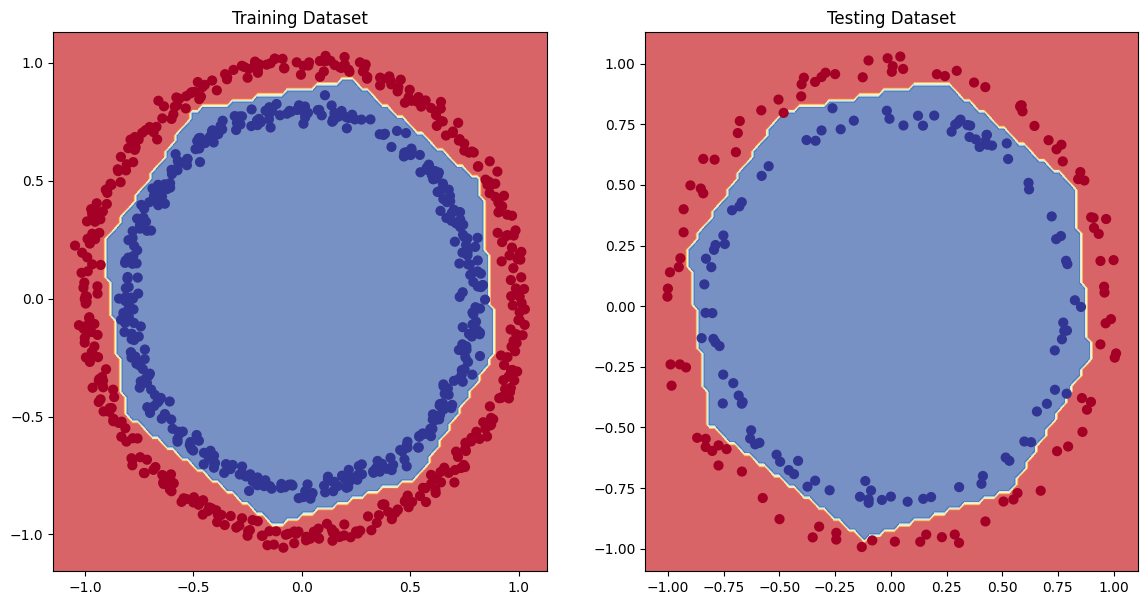

In [26]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Training Dataset")
decision_boundray(model=model_circles_lr10e_2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Dataset")
decision_boundray(model=model_circles_lr10e_2, X=X_test, y=y_test)
plt.show()

![Tensorflow - Classification Problems](../assets/02_Tensorflow_Classifications_12.png)

### Finding the ideal learning rate